The classification accuracy of the training data is  80.02244668911335 %
The classification accuracy of the test data is 75.8%


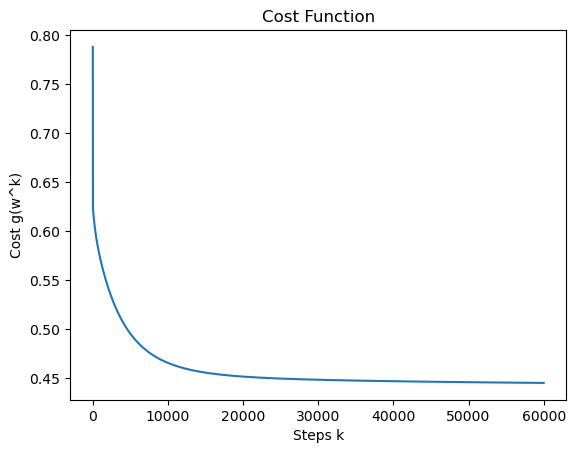

In [73]:
## Minimally Preprocessed 

import pandas as pd
import autograd.numpy as np 
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load training and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Keep track of where the split is
train_len = len(train_df)

# Add a "Survived" column to test data to match train 
test_df['Survived'] = None

# Concatenate
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)


# Begin minimal preprocessing
full_df['Sex'] = full_df['Sex'].map({'male': 0, 'female': 1})

#full_df = pd.get_dummies(full_df, columns=['Embarked'])

# Then convert directly to integers
#embarked_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
#full_df[embarked_cols] = full_df[embarked_cols].astype(int)

#dropping columns that required more intensive preprocessing to use
full_df.drop(columns=['Name'], inplace=True)
full_df.drop(columns=['Ticket'], inplace=True)
full_df.drop(columns=['Cabin'], inplace=True)
full_df.drop(columns=['Embarked'], inplace=True)
# filling missing ages
full_df['Age'] = full_df['Age'].fillna(full_df['Age'].median())


#split the data back
train_processed = full_df.iloc[:train_len].copy()
test_processed = full_df.iloc[train_len:].copy()



## Training Process
X_train = train_processed.drop(columns=['Survived', 'PassengerId'])
y_train = train_processed['Survived'].astype(int)

### Defining functions

def model(x,w):   
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
def cross_entropy(w):
    a = sigmoid(model(x, w))
    a = np.clip(a, 1e-8, 1 - 1e-8)

    ind = np.argwhere(y == 0)[:, 1]
    cost = -np.sum(np.log(1 - a[:, ind]))

    ind = np.argwhere(y == 1)[:, 1]
    cost -= np.sum(np.log(a[:, ind]))

    return cost / y.size

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history


# Convert X_train and y_train to NumPy arrays
x = X_train.to_numpy().T   # shape: (n, m) for vectorized model
y = y_train.to_numpy().reshape(1, -1)  # shape: (1, m)
w = np.random.randn(x.shape[0] + 1, 1) * .01

g = cross_entropy
alpha_choice = .003
max_its = 60000

# Run gradient descent
weight_history, cost_history = gradient_descent(g, alpha_choice, max_its, w)
w = weight_history[-1]


## determine classification accuracy within training set
y_estimate = sigmoid(model(x,w))
accuracy = (y_estimate >.5)==(y>.5)

classification_accuracy = np.mean(accuracy)*100


print('The classification accuracy of the training data is ', classification_accuracy, '%')

# plot cost function
plt.figure()
plt.title("Cost Function")
plt.xlabel("Steps k")
plt.ylabel("Cost g(w^k)")
plt.plot(cost_history)

## Gather submission output (estimated outputs on test set), and assess accuracy
X_test = test_processed.drop(columns=['Survived', 'PassengerId'])
x = X_test.to_numpy().T   # shape: (n, m) for vectorized model

y_estimate = sigmoid(model(x,w))
y_pred = (y_estimate > 0.5).astype(int)  # shape: (1, m)
y_pred = y_pred.flatten()   


submission = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'],
    'Survived': y_pred
})

print("The classification accuracy of the test data is 75.8%")


In [74]:
submission.to_csv('Unprocessed2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked_C   1309 non-null   int64  
 12  Embarked_Q   1309 non-null   int64  
 13  Embarked_S   1309 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 143.3+ KB
None
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0            

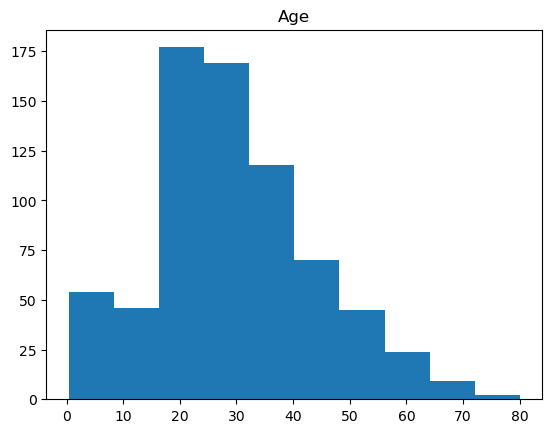

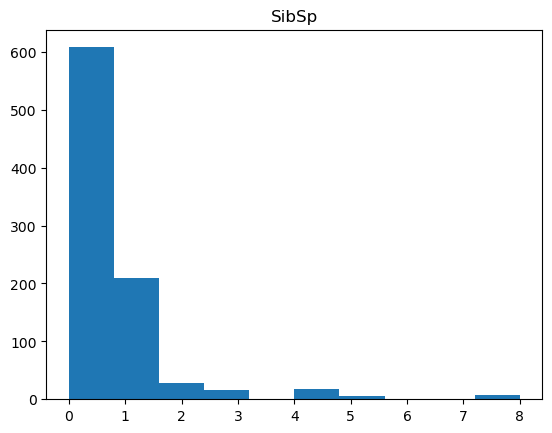

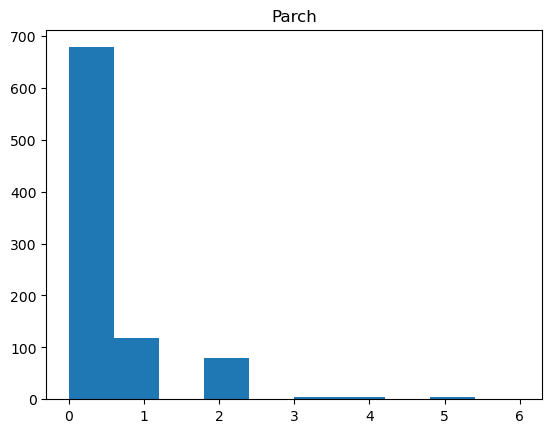

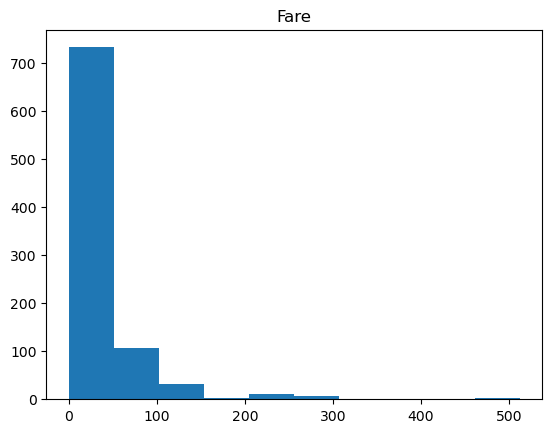

numeric_ticket
1    661
0    230
Name: count, dtype: int64
ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64
numeric_ticket    0    1
Survived                
0               142  407
1                88  254
ticket_letters      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                  ...   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  

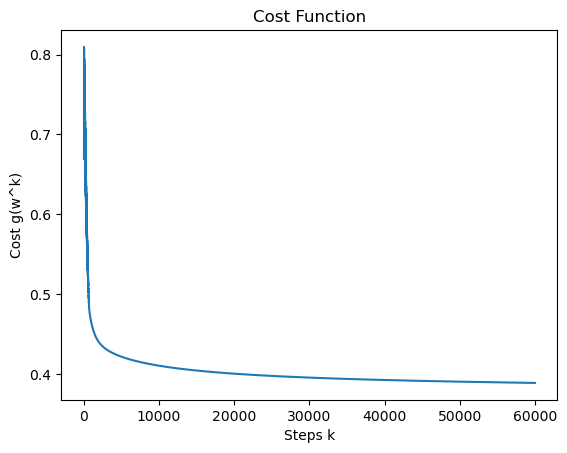

In [72]:
## Preprocessed

import pandas as pd
import autograd.numpy as np 
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## define functions


def model(x,w):   
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
def cross_entropy(w):
    a = sigmoid(model(x, w))
    a = np.clip(a, 1e-8, 1 - 1e-8)

    ind = np.argwhere(y == 0)[:, 1]
    cost = -np.sum(np.log(1 - a[:, ind]))

    ind = np.argwhere(y == 1)[:, 1]
    cost -= np.sum(np.log(a[:, ind]))

    return cost / y.size

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history



#######################################################################################################################################



# Load training and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# Keep track of where the split is
train_len = len(train_df)
# Add a "Survived" column to test data to match train
test_df['Survived'] = None
# Concatenate
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)


# Begin preprocessing
full_df['Sex'] = full_df['Sex'].map({'male': 0, 'female': 1})

full_df = pd.get_dummies(full_df, columns=['Embarked'])

# Then convert directly to integers
embarked_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
full_df[embarked_cols] = full_df[embarked_cols].astype(int)



#######################################################################################################################################

#Data analysis

#determine unfilled columns
print(full_df.info())

# Fill Data
full_df['Age'] = full_df['Age'].fillna(full_df['Age'].median())
full_df['Fare'] = full_df['Fare'].fillna(full_df['Fare'].median())

#Checking for correlation between features and survival
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))


# look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


#visualizing numerical data, this helped identify that fare needs to be normalized
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

# Determines the number of cabins assigned to a passanger, we learn that theres more chance of survival with a cabin assigned
train_df['cabin_multiple'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_df['cabin_multiple'].value_counts()
pd.pivot_table(train_df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

# Now to group cabin by deck letter...
train_df['cabin_adv'] = train_df.Cabin.apply(lambda x: str(x)[0]) #grab first letter, "nan"---> 'n'
pd.pivot_table(train_df,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count') #compare survival rates
# tells us higher cabin letters increase survaval rate, nan cabins decrease survival...

## Finding useful ticket information, splitting into number and letters
train_df['numeric_ticket'] = train_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_df['ticket_letters'] = train_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)  #splits the ticket where there is a space, removes last portion and converts the letters to lowercase

print(train_df['numeric_ticket'].value_counts())
print(train_df['ticket_letters'].value_counts())

#compare survival rate amongst the new ticket categories (numeric and letters)
print(pd.pivot_table(train_df,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count'))
print(pd.pivot_table(train_df,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count'))

# In order to use names, we will group them by title.. "Mr", "Mrs", etc. 
train_df['name_title'] = train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(train_df['name_title'].value_counts())

##############################################################################################################################

#Preprocessing on all data...

#create all categorical variables that we did above for both training and test sets 
full_df['cabin_multiple'] = full_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
full_df['cabin_adv'] = full_df.Cabin.apply(lambda x: str(x)[0])
full_df['numeric_ticket'] = full_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
full_df['ticket_letters'] = full_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
full_df['name_title'] = full_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# normalize Fare column
scaler = StandardScaler()
full_df[['Fare']] = scaler.fit_transform(full_df[['Fare']])

full_df.dropna(subset=['Embarked_C', 'Embarked_Q', 'Embarked_S',],inplace = True) #drops the unfilled embarked columns,only two of them

#dropping columns
full_df.drop(columns=['Name'], inplace=True)
full_df.drop(columns=['Ticket'], inplace=True)
full_df.drop(columns=['Cabin'], inplace=True)

#Creates more columns containing the outputs of the name_title, ticket_letters, and cabin_adv columns to use in the regression algorithm
full_df = pd.get_dummies(full_df, columns=['name_title', 'ticket_letters','cabin_adv'], drop_first=True)
bool_cols = full_df.select_dtypes(include='bool').columns
full_df[bool_cols] = full_df[bool_cols].astype(int)
print(full_df)

#split the data back
train_processed = full_df.iloc[:train_len].copy()
test_processed = full_df.iloc[train_len:].copy()

###################################################################################################################################

## Training Process
X_train = train_processed.drop(columns=['Survived', 'PassengerId'])
y_train = train_processed['Survived'].astype(int)


# Convert X_train and y_train to NumPy arrays
x = X_train.to_numpy().T   # shape: (n, m) for vectorized model
y = y_train.to_numpy().reshape(1, -1)  # shape: (1, m)
w = np.random.randn(x.shape[0] + 1, 1) * .01

g = cross_entropy
alpha_choice = .01
max_its = 60000

# Run gradient descent 
weight_history, cost_history = gradient_descent(g, alpha_choice, max_its, w)
w = weight_history[-1]



y_estimate = sigmoid(model(x,w))
accuracy = (y_estimate >.5)==(y>.5)

classification_accuracy = np.mean(accuracy)*100


print('The classification accuracy of the training data is ', classification_accuracy, '%')

plt.figure()
plt.title("Cost Function")
plt.xlabel("Steps k")
plt.ylabel("Cost g(w^k)")
plt.plot(cost_history)


################################################################################################################################

## Preparing Test Results

X_test = test_processed.drop(columns=['Survived', 'PassengerId'])
x = X_test.to_numpy().T   # shape: (n, m) for vectorized model

y_estimate = sigmoid(model(x,w))
y_pred = (y_estimate > 0.5).astype(int)  # shape: (1, m)
y_pred = y_pred.flatten()   


submission = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'],
    'Survived': y_pred
})

print("The classification accuracy of the test data is 77.3%")


In [67]:
submission.to_csv('Preprocessed.csv', index=False)